In [26]:
subscription_key = '7565b107da73455b983fee7256c6d5c2'
assert subscription_key

In [30]:
face_api_url = 'https://eastus.api.cognitive.microsoft.com/face/v1.0/detect'
face_api_url = 'https://ejemploitam.cognitiveservices.azure.com/face/v1.0/detect'

In [31]:
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

In [40]:
import requests
from IPython.display import HTML

#headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
headers = { 'Ocp-Apim-Subscription-Key': subscription_key,
            'Content-Type': 'application/octet-stream'}

params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

image_name = 'Comp.png'
#response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_ur})
response = requests.post(face_api_url, params=params, headers=headers, data = open(image_name, 'rb').read())
print(response)
faces = response.json()
HTML("<font size=5>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

<Response [200]>


{'smile': 0.945, 'headPose': {'pitch': 3.9, 'roll': 0.1, 'yaw': -1.3}, 'gender': 'male', 'age': 38.0, 'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.021, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.945, 'neutral': 0.033, 'sadness': 0.0, 'surprise': 0.0}, 'blur': {'blurLevel': 'low', 'value': 0.15}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.66}, 'noise': {'noiseLevel': 'low', 'value': 0.24}, 'makeup': {'eyeMakeup': False, 'lipMakeup': False}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.02, 'invisible': False, 'hairColor': [{'color': 'brown', 'confidence': 0.99}, {'color': 'gray', 'confidence': 0.86}, {'color': 'blond', 'confidence': 0.73}, {'color': 'black', 'confidence': 0.34}, {'color': 'red', 'confidence': 0.03}, {'color': 'other', 'confidence': 0.02}]}}
{'smile': 1.0, 'headPose': {'pitch': -3.4, 'roll': -3

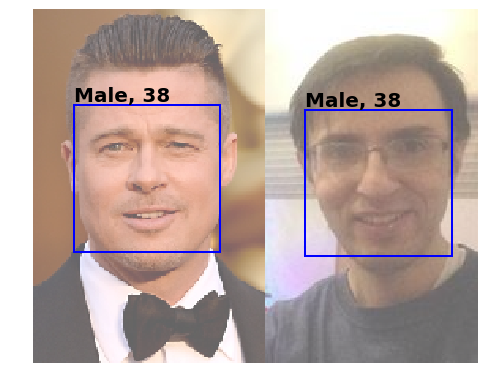

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

#response = requests.get(image_url)
#image = Image.open(BytesIO(response.content))
image = Image.open(image_name)

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    print(fa)
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")